In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mpl_colors
import sys
from processing_emisiones import *

#paqueteria para ML
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

/Users/nicocisneros/Desktop/PERSONAL/TEC/SEXTO SEMESTRE/AI AND DA I/Evidencia_comisiones/processing_emisiones.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_emision= pd.read_csv(sio_file_emision, encoding = 'utf8', sep = ',', on_bad_lines='warn')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816498 entries, 0 to 816497
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   EDAD                    816498 non-null  object
 1   COBERTURA               816498 non-null  object
 2   PLAN DE LA POLIZA       816498 non-null  object
 3   MODALIDAD DE LA POLIZA  816498 non-null  object
 4   MONEDA                  816498 non-null  object
 5   ENTIDAD                 816498 non-null  object
 6   SEXO                    816498 non-null  object
 7   FORMA DE VENTA          816498 non-null  object
 8   NUMERO DE ASEGURADOS    816498 non-null  object
 9   PRIMA EMITIDA           816498 non-null  object
 10  SUMA ASEGURADA          816498 non-null  object
dtypes: object(11)
memory usage: 68.5+ MB
None
EDAD                      0
COBERTURA                 0
PLAN DE LA POLIZA         0
MODALIDAD DE LA POLIZA    0
MONEDA                    0
ENTIDAD      

In [2]:
df = process_emisiones()

/Users/nicocisneros/Desktop/PERSONAL/TEC/SEXTO SEMESTRE/AI AND DA I/Evidencia_comisiones/processing_emisiones.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_emision= pd.read_csv(sio_file_emision, encoding = 'utf8', sep = ',', on_bad_lines='warn')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816498 entries, 0 to 816497
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   EDAD                    816498 non-null  object
 1   COBERTURA               816498 non-null  object
 2   PLAN DE LA POLIZA       816498 non-null  object
 3   MODALIDAD DE LA POLIZA  816498 non-null  object
 4   MONEDA                  816498 non-null  object
 5   ENTIDAD                 816498 non-null  object
 6   SEXO                    816498 non-null  object
 7   FORMA DE VENTA          816498 non-null  object
 8   NUMERO DE ASEGURADOS    816498 non-null  object
 9   PRIMA EMITIDA           816498 non-null  object
 10  SUMA ASEGURADA          816498 non-null  object
dtypes: object(11)
memory usage: 68.5+ MB
None
EDAD                      0
COBERTURA                 0
PLAN DE LA POLIZA         0
MODALIDAD DE LA POLIZA    0
MONEDA                    0
ENTIDAD      

In [4]:
df

,EDAD,COBERTURA,PLAN DE LA POLIZA,MODALIDAD DE LA POLIZA,MONEDA,ENTIDAD,SEXO,FORMA DE VENTA,NUMERO DE ASEGURADOS,PRIMA EMITIDA,SUMA ASEGURADA
0,22,Exención de pago de prima,Vitalicio,Tradicional,Extranjera,Chihuahua,Femenino,Agentes Persona Física,1,128,0
1,47,Fallecimiento,Vitalicio,Tradicional,Extranjera,Coahuila,Masculino,Fuerza de Venta Interna o Casa Matriz,6,146947,9432862
2,34,Fallecimiento,Dotal Mixto,Tradicional,Indizada,Querétaro,Femenino,Agentes Persona Física,64,1206118,36899162
3,29,Fallecimiento,Temporal,Tradicional,Nacional,Hidalgo,Femenino,Telemercadeo,102,38842,13457299
4,54,Sobrevivencia,Dotal Mixto,Tradicional,Extranjera,Mexico,Masculino,Otra Forma de Venta,10,15704,1148046
...,...,...,...,...,...,...,...,...,...,...,...
816493,61,Ahorro / inversión,Temporal,Flexible sin tasa garantizada,Nacional,Colima,Femenino,Agentes Persona Física,2,235928,4716901
816494,68,Muerte accidental (Doble indemnización),Temporal,Tradicional,Nacional,Quintana Roo,Masculino,Telemercadeo,10,810,1288479
816495,53,Muerte colectiva (Triple indemnización),Vitalicio,Tradicional,Indizada,San Luis Potosí,Femenino,Empresas Comerciales,1,0,21248
816496,57,Muerte accidental (Doble indemnización),Dotal Puro,Tradicional,Indizada,Ciudad de México,Masculino,Fuerza de Venta Interna o Casa Matriz,1,35,69380


In [5]:
df = df.apply(pd.to_numeric, downcast='integer', errors='ignore')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816498 entries, 0 to 816497
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   EDAD                    816498 non-null  int8  
 1   COBERTURA               816498 non-null  object
 2   PLAN DE LA POLIZA       816498 non-null  object
 3   MODALIDAD DE LA POLIZA  816498 non-null  object
 4   MONEDA                  816498 non-null  object
 5   ENTIDAD                 816498 non-null  object
 6   SEXO                    816498 non-null  object
 7   FORMA DE VENTA          816498 non-null  object
 8   NUMERO DE ASEGURADOS    816498 non-null  int32 
 9   PRIMA EMITIDA           816498 non-null  int64 
 10  SUMA ASEGURADA          816498 non-null  int64 
dtypes: int32(1), int64(2), int8(1), object(7)
memory usage: 60.0+ MB


In [7]:
df[['EDAD']] = df[['EDAD']].astype('int32')

In [9]:
df['COBERTURA'], cat_COBERTURA = pd.factorize(df['COBERTURA'])
df['PLAN DE LA POLIZA'], cat_Plan = pd.factorize(df['PLAN DE LA POLIZA'])
df['MODALIDAD DE LA POLIZA'], cat_Modalidad = pd.factorize(df['MODALIDAD DE LA POLIZA'])
df['MONEDA'], cat_Moneda = pd.factorize(df['MONEDA'])
df['ENTIDAD '], cat_ENTIDAD = pd.factorize(df['ENTIDAD '])
df['SEXO'], cat_SEXO = pd.factorize(df['SEXO'])
df['FORMA DE VENTA'], cat_Forma = pd.factorize(df['FORMA DE VENTA'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816498 entries, 0 to 816497
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   EDAD                    816498 non-null  int32
 1   COBERTURA               816498 non-null  int64
 2   PLAN DE LA POLIZA       816498 non-null  int64
 3   MODALIDAD DE LA POLIZA  816498 non-null  int64
 4   MONEDA                  816498 non-null  int64
 5   ENTIDAD                 816498 non-null  int64
 6   SEXO                    816498 non-null  int64
 7   FORMA DE VENTA          816498 non-null  int64
 8   NUMERO DE ASEGURADOS    816498 non-null  int32
 9   PRIMA EMITIDA           816498 non-null  int64
 10  SUMA ASEGURADA          816498 non-null  int64
dtypes: int32(2), int64(9)
memory usage: 62.3 MB


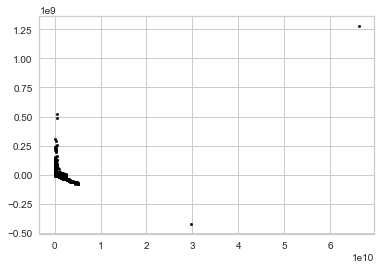

In [11]:
#vamos a reducir la dimensionalidad de estos datos, pues lo usaremos para graficar
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xshort = pca.fit_transform(df)
plt.scatter(Xshort[:,0], Xshort[:,1], c='black', s=7)
plt.show()

In [12]:
rescaleX = StandardScaler().fit_transform(df)
Xescaled = pd.DataFrame(data = rescaleX, columns = df.columns)
Xescaled

,EDAD,COBERTURA,PLAN DE LA POLIZA,MODALIDAD DE LA POLIZA,MONEDA,ENTIDAD,SEXO,FORMA DE VENTA,NUMERO DE ASEGURADOS,PRIMA EMITIDA,SUMA ASEGURADA
0,-1.43,-1.22,-1.39,-0.61,-1.75,-1.65,-1.04,-0.96,-0.12,-0.06,-0.16
1,0.06,-0.97,-1.39,-0.61,-1.75,-1.54,0.96,-0.65,-0.11,-0.02,-0.08
2,-0.72,-0.97,-0.30,-0.61,-0.48,-1.43,-1.04,-0.96,0.02,0.28,0.15
3,-1.01,-0.97,0.80,-0.61,0.78,-1.32,-1.04,-0.33,0.10,-0.05,-0.05
4,0.48,-0.72,-0.30,-0.61,-1.75,-1.21,0.96,-0.02,-0.10,-0.06,-0.15
...,...,...,...,...,...,...,...,...,...,...,...
816493,0.89,0.27,0.80,-0.05,0.78,0.65,-1.04,-0.96,-0.11,0.00,-0.12
816494,1.31,1.02,0.80,-0.61,0.78,1.64,0.96,-0.33,-0.10,-0.06,-0.15
816495,0.42,-0.47,-1.39,-0.61,-0.48,-0.22,-1.04,1.85,-0.12,-0.06,-0.16
816496,0.66,1.02,4.10,-0.61,-0.48,-0.33,0.96,-0.65,-0.12,-0.06,-0.16


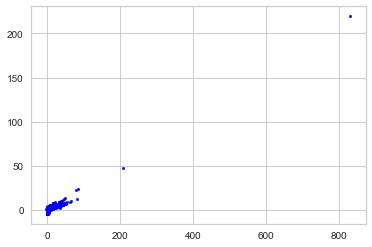

In [13]:
#vamos a reducir la dimensionalidad de estos datos, pues lo usaremos para graficar
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xescaled_short = pca.fit_transform(Xescaled)
plt.scatter(Xescaled_short[:,0], Xescaled_short[:,1], c='blue', s=7)
plt.show()

In [14]:
K = 5
kmeans_gral = KMeans(n_clusters=K, random_state=0, n_init=50).fit(Xescaled)
kmeans_gral.labels_ #grupos a los cuales cada elemeto 

array([4, 4, 4, ..., 0, 1, 1], dtype=int32)

In [15]:
kmeans_gral.cluster_centers_

array([[ 1.19821454e-01,  1.99264579e-02,  2.24993054e-01,
        -3.03193074e-02,  6.00410637e-01,  1.74762986e-02,
        -1.03951380e+00,  3.84203157e-01,  2.77134559e-02,
        -1.63972134e-03, -4.09845620e-03],
       [ 1.48590584e-01,  2.76722549e-02,  2.62230983e-01,
        -2.63857317e-02,  6.56609139e-01,  1.53035410e-02,
         9.61947501e-01,  3.67845475e-01,  2.80191771e-02,
         6.69584890e-03,  1.01330097e-02],
       [-2.80253161e+00, -7.24703330e-01,  5.19758612e+00,
         5.02175307e+00,  2.04296334e+00,  2.18823043e+00,
         2.96330141e+00,  2.79125273e+00,  1.78747442e+02,
         7.01069736e+02,  5.69268920e+02],
       [-8.12081935e-02,  2.46860068e-02,  8.51620783e-01,
        -5.47449463e-01,  7.93557876e-01, -3.04522982e-01,
         2.79035878e-02, -3.00248967e-01,  5.80756061e+01,
         7.31071046e-01,  1.17454403e+01],
       [-2.36123990e-01, -4.19018353e-02, -4.29223693e-01,
         5.01900707e-02, -1.10639973e+00, -2.86532846e-02,
  

In [16]:
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xcenters = pca.fit_transform(kmeans_gral.cluster_centers_)
Xcenters

array([[-187.769189  ,  -13.84027982],
       [-187.74730615,  -13.84152945],
       [ 732.79102509,   -0.84507232],
       [-169.46916787,   42.49926385],
       [-187.80536207,  -13.97238226]])

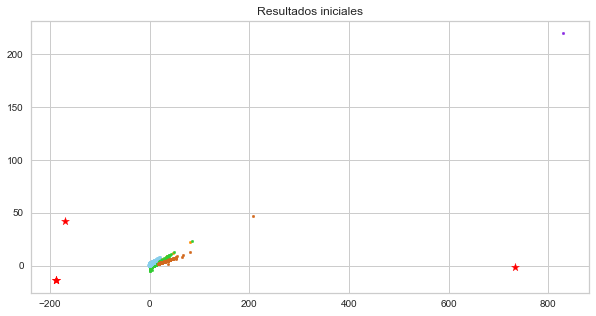

In [17]:
#vamos a visualizar los resultados

colors = ['darkorange', 'limegreen', 'blueviolet', 'chocolate', 'skyblue', 'tab:pink', 'tab:orange'] #ver más en: https://matplotlib.org/stable/gallery/color/named_colors.html
fig, ax = plt.subplots(figsize=(10, 5))

#graficamos los datos, cada uno con un color diferente representando un cluster
for i in range(K):
  points = np.array([Xescaled_short[j] for j in range (len(Xescaled_short)) if kmeans_gral.labels_[j] == i]) 
  ax.scatter(points[:,0], points[:,1], s=7, c = colors[i])

#graficamos los centros de los clusters
ax.scatter(Xcenters[:,0], Xcenters[:,1], marker='*',s=70, c='red')

plt.title("Resultados iniciales")
plt.show()

In [18]:
K = 5
kmeans_gral = KMeans(n_clusters=K, random_state=0, n_init=50).fit(Xescaled)
kmeans_gral.labels_ 

array([4, 4, 4, ..., 0, 1, 1], dtype=int32)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


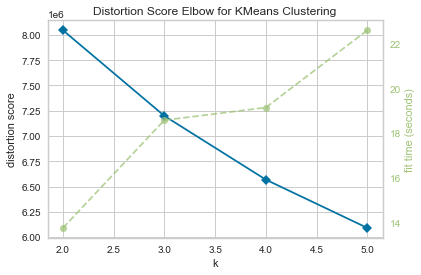

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
visualizer = KElbowVisualizer(kmeans_gral, k=(2,6))
visualizer.fit(Xescaled)  
visualizer.show()       